In [1]:
##### dataframe notes

In [2]:
# print(df.head(1))
# print(df.index) # row index
# print(df.columns) # column index

In [3]:
# df['TNFNFY2x']+df['TNFNFY2X'] # adding up two columns

In [4]:
# df.filter(regex='TNFNFY2.', axis=1) # filtering columns with regex
# df.iloc[:,0:151].filter(regex='...--Y2.', axis=1).sum(axis=1) # regex sum up

In [5]:
#df.iloc[:,0:151].filter(regex='.....C1.', axis=1).sum(axis=1)

In [6]:
##### this program aims to use pandas to manipulate tsv files

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]

In [9]:
df = pd.read_csv('monthly_data_0.txt', sep='\t') # convert tsv to pandas data frame

In [10]:
# scale func to show x-axis in years
scale_x = 365
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))

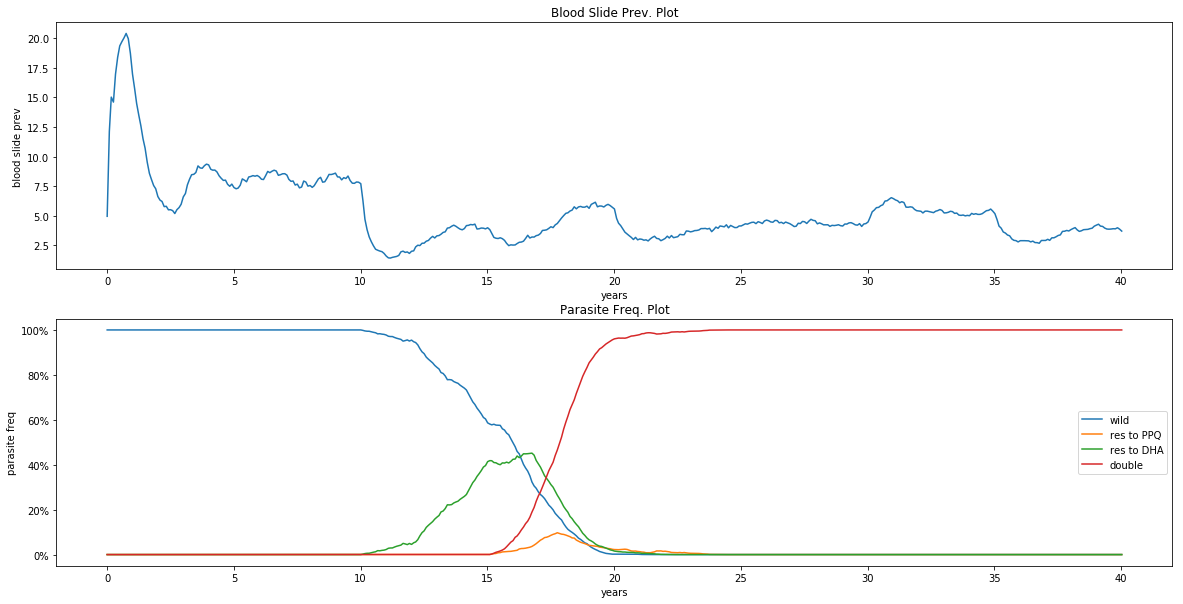

In [11]:
# blood_slide_prevalence plot
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(df['current_time'], df['blood_slide_prev'])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1825))
ax1.xaxis.set_major_formatter(ticks_x)
ax1.set_xlabel('years')
ax1.set_ylabel('blood slide prev')
ax1.set_title('Blood Slide Prev. Plot')

# sum up total num of parasites in the silumation
tot_para = df.iloc[:,22:150].sum(axis=1)
# parasite freq plot
ax2 = fig.add_subplot(212)
# grouped comparisons for DHA-PPQ resistance
ax2.plot(df['current_time'], df.iloc[:,0:151].filter(regex='.....C1.', axis=1).sum(axis=1)/tot_para, label='wild')
ax2.plot(df['current_time'], df.iloc[:,0:151].filter(regex='.....C2.', axis=1).sum(axis=1)/tot_para, label='res to PPQ')
ax2.plot(df['current_time'], df.iloc[:,0:151].filter(regex='.....Y1.', axis=1).sum(axis=1)/tot_para, label='res to DHA')
ax2.plot(df['current_time'], df.iloc[:,0:151].filter(regex='.....Y2.', axis=1).sum(axis=1)/tot_para, label='double')

# format x-axis
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1825))
ax2.xaxis.set_major_formatter(ticks_x)
# format y-axis
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
ax2.set_xlabel('years')
ax2.set_ylabel('parasite freq')
ax2.set_title('Parasite Freq. Plot')
ax2.legend()

In [12]:
#       DHAPPQ       ASAQ         AL         DHAPPQ        ASAQ         AL         DHAPPQ        ASAQ         AL